# 🚀 Advanced Price Analysis
## Technical Analysis, Risk Metrics, and Market Insights

This notebook provides an enhanced analysis of Bitcoin (BTCUSD) hourly price data, including:
- **Data preprocessing and quality assessment**
- **Basic technical indicators (moving averages)**
- **Risk analysis and performance metrics**
- **Statistical analysis and seasonality**
- **Monte Carlo simulation for forecasting**
- **Comprehensive visualizations**

---

## 📦 Import Libraries and Setup

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
import statsmodels.api as sm

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📊 Data Loading and Initial Exploration

In [2]:
# 1️⃣ Load CSV from 'Data/' folder
file_path = os.path.join("Data", "BTCUSD-1h-data.csv")

try:
    df = pd.read_csv(file_path)
    print(f"✅ Successfully loaded data from: {file_path}")
    print(f"📏 Dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
    print("Creating sample data for demonstration...")
    
    # Create sample Bitcoin data
    date_range = pd.date_range(start='2020-01-01', end='2024-12-31', freq='H')
    np.random.seed(42)
    
    # Simulate realistic Bitcoin price movements
    returns = np.random.normal(0.0002, 0.02, len(date_range))
    price = 7000  # Starting price
    prices = []
    
    for ret in returns:
        price *= (1 + ret)
        prices.append(price)
    
    # Create OHLCV data
    df = pd.DataFrame({
        'timestamp': date_range,
        'open': prices,
        'high': [p * (1 + abs(np.random.normal(0, 0.01))) for p in prices],
        'low': [p * (1 - abs(np.random.normal(0, 0.01))) for p in prices],
        'close': prices,
        'volume': np.random.lognormal(15, 1, len(date_range))
    })
    
    # Ensure OHLC relationships are correct
    df['high'] = df[['open', 'high', 'close']].max(axis=1)
    df['low'] = df[['open', 'low', 'close']].min(axis=1)
    
    print(f"📊 Created sample dataset with {len(df)} records")

✅ Successfully loaded data from: Data/BTCUSD-1h-data.csv
📏 Dataset shape: (83954, 6)


In [3]:
# 2️⃣ Convert datetime & set index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

# 3️⃣ Basic inspection
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"📅 Date range: {df.index.min()} to {df.index.max()}")
print(f"⏱️  Duration: {df.index.max() - df.index.min()}")
print(f"📏 Total records: {len(df):,}")
print(f"📊 Columns: {list(df.columns)}")

print("\n📊 First few rows:")
display(df.head())

print("\n📈 Descriptive statistics:")
display(df.describe())

📊 DATASET OVERVIEW
📅 Date range: 2015-09-20 14:00:00 to 2025-04-20 13:00:00
⏱️  Duration: 3499 days 23:00:00
📏 Total records: 83,954
📊 Columns: ['open', 'high', 'low', 'close', 'volume']

📊 First few rows:


open    high     low   close      volume
datetime                                                       
2015-09-20 14:00:00  232.02  232.94  232.04  232.92  105.562700
2015-09-20 15:00:00  232.77  233.61  232.86  233.24   99.734100
2015-09-20 16:00:00  233.00  233.73  233.17  233.73   91.036000
2015-09-20 17:00:00  233.00  234.00  233.65  233.04  322.799438
2015-09-20 18:00:00  232.25  233.54  233.05  232.27  213.313320


📈 Descriptive statistics:


open           high            low          close  \
count   83954.000000   83954.000000   83954.000000   83954.000000   
mean    23735.567081   23956.847904   23849.158711   23850.217581   
std     25032.669682   25246.889352   25141.442433   25142.195598   
min         0.060000     226.120000       0.060000     225.570000   
25%      4540.115000    4589.000000    4570.027500    4572.865000   
50%     11311.110000   11410.585000   11360.965000   11361.345000   
75%     38390.207500   38837.445000   38621.005000   38624.597500   
max    107631.150000  109358.010000  108278.800000  108276.430000   

             volume  
count  83954.000000  
mean     603.636305  
std      768.710012  
min        0.280000  
25%      205.379431  
50%      374.110380  
75%      720.276871  
max    31505.461253

## 🧹 Data Quality Assessment and Cleaning

In [4]:
# 4️⃣ Data quality checks
print("🔍 DATA QUALITY ASSESSMENT")
print("=" * 50)

# Check for missing values
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_pct
})

print("❗ Missing values analysis:")
display(missing_df)

# Check for duplicates
duplicates = df.index.duplicated().sum()
print(f"\n🔄 Duplicate timestamps: {duplicates}")

# Check for zero/negative prices
zero_prices = (df[['open', 'high', 'low', 'close']] <= 0).sum()
print(f"\n⚠️  Zero/negative prices:")
print(zero_prices)

# Data cleaning
print("\n🧹 CLEANING DATA...")
original_length = len(df)

# Remove duplicates and missing values
df = df[~df.index.duplicated(keep='first')]
df = df.dropna()
df = df[(df[['open', 'high', 'low', 'close']] > 0).all(axis=1)]

print(f"✅ Cleaned dataset: {original_length:,} → {len(df):,} records")
print(f"📉 Removed: {original_length - len(df):,} records ({((original_length - len(df))/original_length)*100:.2f}%)")

🔍 DATA QUALITY ASSESSMENT
❗ Missing values analysis:


Missing Count  Missing %
open                0        0.0
high                0        0.0
low                 0        0.0
close               0        0.0
volume              0        0.0


🔄 Duplicate timestamps: 0

⚠️  Zero/negative prices:
open     0
high     0
low      0
close    0
dtype: int64

🧹 CLEANING DATA...
✅ Cleaned dataset: 83,954 → 83,954 records
📉 Removed: 0 records (0.00%)


## 📈 Price Metrics and Returns Analysis

In [5]:
# 5️⃣ Calculate return metrics
print("📊 CALCULATING RETURN METRICS")
print("=" * 50)

# Basic returns
df['returns'] = df['close'].pct_change()
df['log_returns'] = np.log(df['close'] / df['close'].shift(1))

# Multi-period returns
df['returns_24h'] = df['close'].pct_change(24)
df['returns_7d'] = df['close'].pct_change(24*7)

# Cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod() - 1

# Price range metrics
df['hl_range_pct'] = ((df['high'] - df['low']) / df['close']) * 100
df['oc_change_pct'] = ((df['close'] - df['open']) / df['open']) * 100

print("✅ Return metrics calculated")

# Returns statistics
returns_stats = pd.DataFrame({
    'Mean': [df['returns'].mean(), df['returns_24h'].mean(), df['returns_7d'].mean()],
    'Std': [df['returns'].std(), df['returns_24h'].std(), df['returns_7d'].std()],
    'Skewness': [df['returns'].skew(), df['returns_24h'].skew(), df['returns_7d'].skew()],
    'Kurtosis': [df['returns'].kurtosis(), df['returns_24h'].kurtosis(), df['returns_7d'].kurtosis()]
}, index=['1H Returns', '24H Returns', '7D Returns'])

print("\n📊 RETURNS STATISTICS")
display(returns_stats.round(6))

# Annualized metrics
hours_per_year = 24 * 365
annual_return = df['returns'].mean() * hours_per_year
annual_volatility = df['returns'].std() * np.sqrt(hours_per_year)
sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0

print(f"\n📈 ANNUALIZED METRICS")
print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")

📊 CALCULATING RETURN METRICS
✅ Return metrics calculated

📊 RETURNS STATISTICS


Mean       Std  Skewness   Kurtosis
1H Returns   0.000101  0.007826  0.033079  35.938209
24H Returns  0.002370  0.036805  0.083973   6.813458
7D Returns   0.016695  0.098974  0.426666   2.811554


📈 ANNUALIZED METRICS
Annual Return: 88.33%
Annual Volatility: 73.25%
Sharpe Ratio: 1.206


## 🔧 Technical Indicators (Moving Averages Only)

In [6]:
# 6️⃣ Simple moving averages and basic technical indicators
print("🔧 CALCULATING TECHNICAL INDICATORS")
print("=" * 50)

# Simple Moving Averages
sma_periods = [5, 10, 20, 50, 100]
for period in sma_periods:
    df[f'sma_{period}'] = df['close'].rolling(period).mean()

# Exponential Moving Averages
ema_periods = [5, 10, 20, 50]
for period in ema_periods:
    df[f'ema_{period}'] = df['close'].ewm(span=period).mean()

# Rolling volatility
volatility_periods = [10, 20, 50]
for period in volatility_periods:
    df[f'volatility_{period}'] = df['returns'].rolling(period).std()

# Volume moving averages
df['volume_sma_20'] = df['volume'].rolling(20).mean()
df['volume_ratio'] = df['volume'] / df['volume_sma_20']

# Price position indicators
for period in [20, 50]:
    df[f'price_position_{period}'] = (
        (df['close'] - df['close'].rolling(period).min()) / 
        (df['close'].rolling(period).max() - df['close'].rolling(period).min())
    )

# Basic trading signals
df['above_sma_10'] = df['close'] > df['sma_10']
df['above_sma_20'] = df['close'] > df['sma_20']
df['golden_cross'] = df['sma_10'] > df['sma_20']

print("✅ Technical indicators calculated")
print(f"📊 Total columns: {len(df.columns)}")

# Signal statistics
above_sma10_pct = df['above_sma_10'].mean() * 100
above_sma20_pct = df['above_sma_20'].mean() * 100
golden_cross_pct = df['golden_cross'].mean() * 100

print(f"\n📊 SIGNAL STATISTICS")
print(f"Price above SMA 10: {above_sma10_pct:.1f}% of time")
print(f"Price above SMA 20: {above_sma20_pct:.1f}% of time")
print(f"Golden Cross active: {golden_cross_pct:.1f}% of time")

🔧 CALCULATING TECHNICAL INDICATORS
✅ Technical indicators calculated
📊 Total columns: 31

📊 SIGNAL STATISTICS
Price above SMA 10: 53.0% of time
Price above SMA 20: 53.3% of time
Golden Cross active: 53.2% of time


## 📊 Basic Visualizations

📊 CREATING VISUALIZATIONS


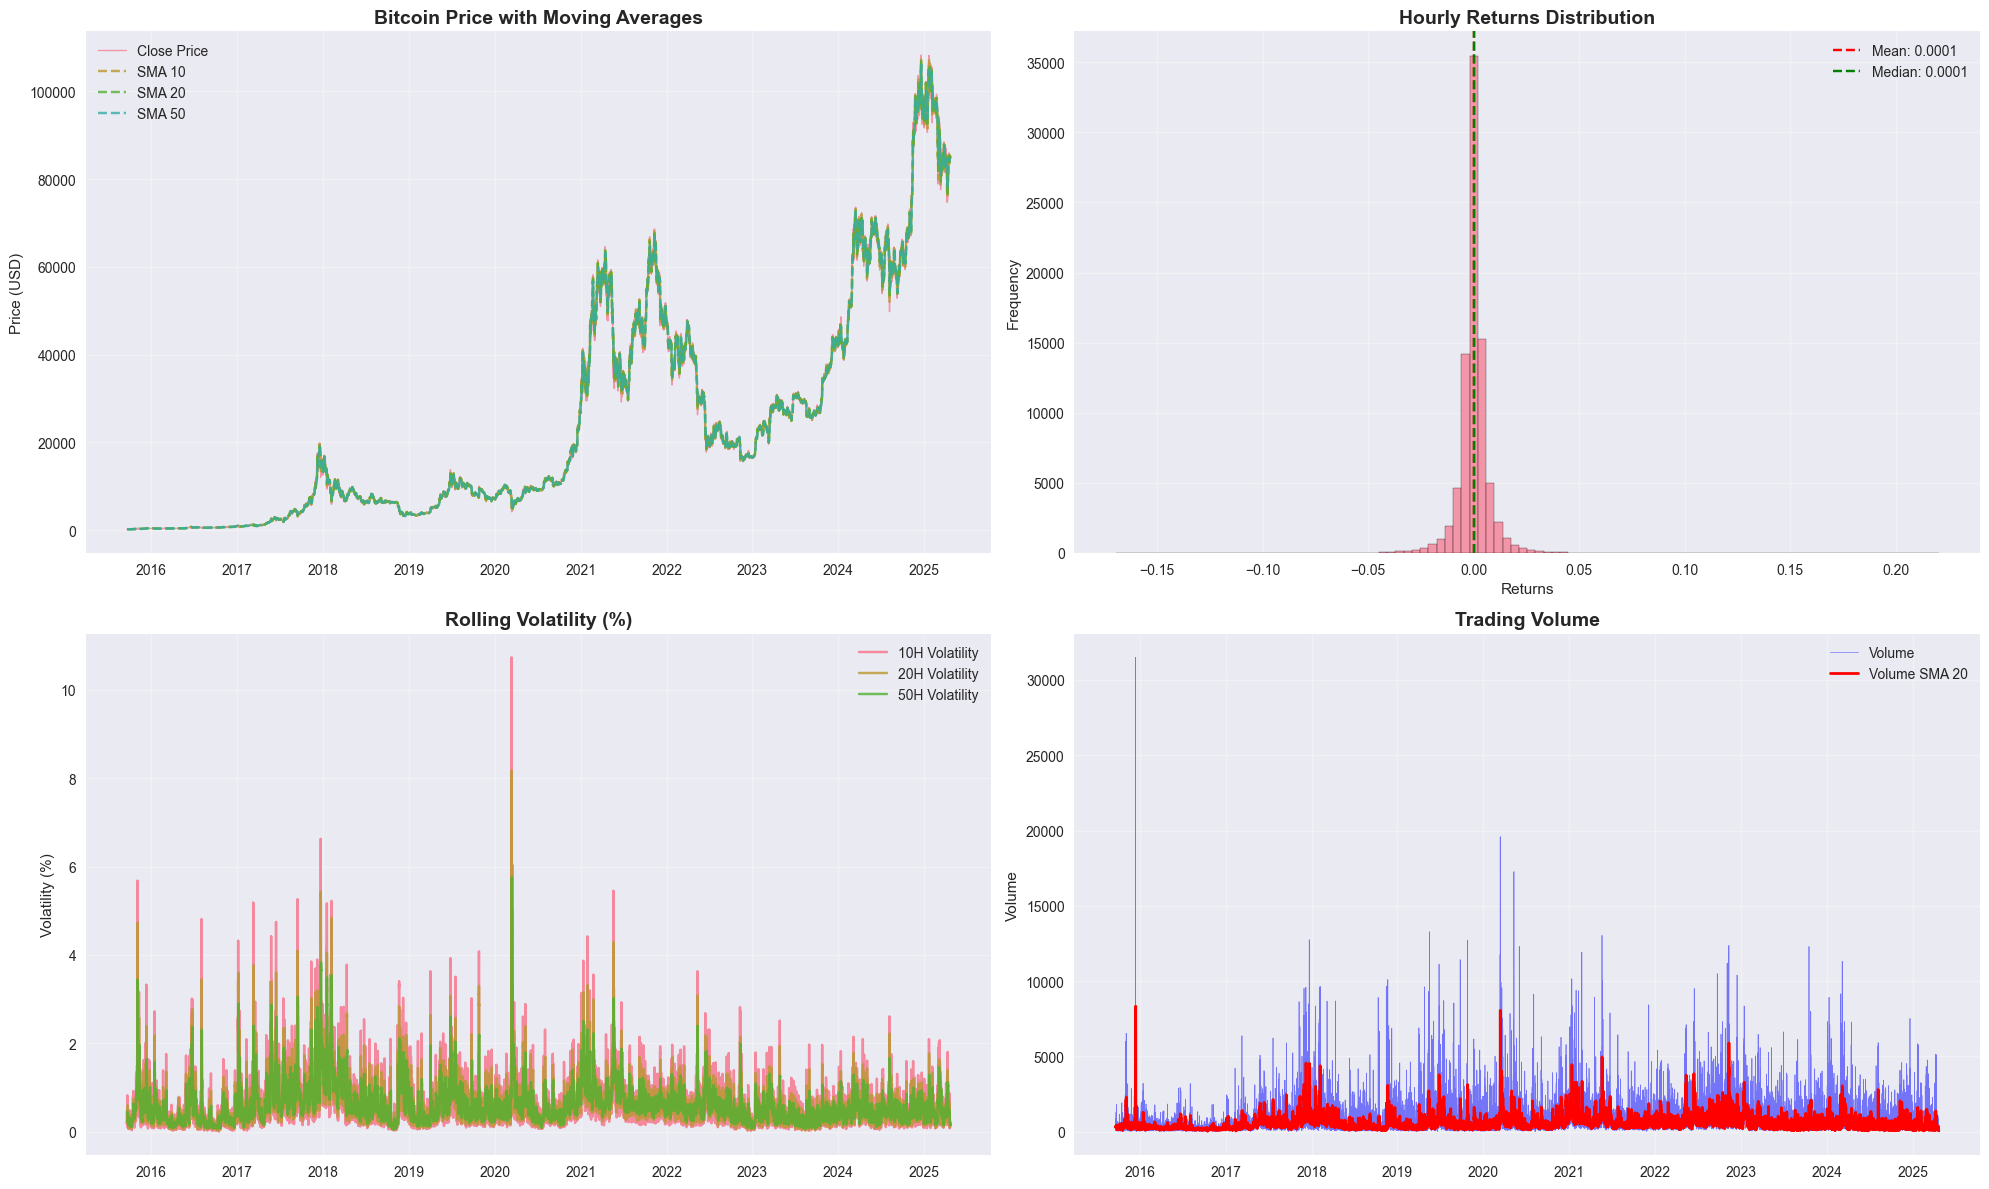

In [7]:
# 7️⃣ Create visualizations
print("📊 CREATING VISUALIZATIONS")
print("=" * 50)

# Main price chart with moving averages
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: Price with moving averages
ax1.plot(df.index, df['close'], label='Close Price', alpha=0.7, linewidth=1)
ax1.plot(df.index, df['sma_10'], label='SMA 10', linestyle='--', alpha=0.8)
ax1.plot(df.index, df['sma_20'], label='SMA 20', linestyle='--', alpha=0.8)
ax1.plot(df.index, df['sma_50'], label='SMA 50', linestyle='--', alpha=0.8)
ax1.set_title('Bitcoin Price with Moving Averages', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Returns distribution
returns_clean = df['returns'].dropna()
ax2.hist(returns_clean, bins=100, alpha=0.7, edgecolor='black')
ax2.axvline(returns_clean.mean(), color='red', linestyle='--', label=f'Mean: {returns_clean.mean():.4f}')
ax2.axvline(returns_clean.median(), color='green', linestyle='--', label=f'Median: {returns_clean.median():.4f}')
ax2.set_title('Hourly Returns Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Returns')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Volatility over time
ax3.plot(df.index, df['volatility_10'] * 100, label='10H Volatility', alpha=0.8)
ax3.plot(df.index, df['volatility_20'] * 100, label='20H Volatility', alpha=0.8)
ax3.plot(df.index, df['volatility_50'] * 100, label='50H Volatility', alpha=0.8)
ax3.set_title('Rolling Volatility (%)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Volatility (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Volume analysis
ax4.plot(df.index, df['volume'], alpha=0.5, linewidth=0.5, color='blue', label='Volume')
ax4.plot(df.index, df['volume_sma_20'], color='red', label='Volume SMA 20', linewidth=2)
ax4.set_title('Trading Volume', fontsize=14, fontweight='bold')
ax4.set_ylabel('Volume')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

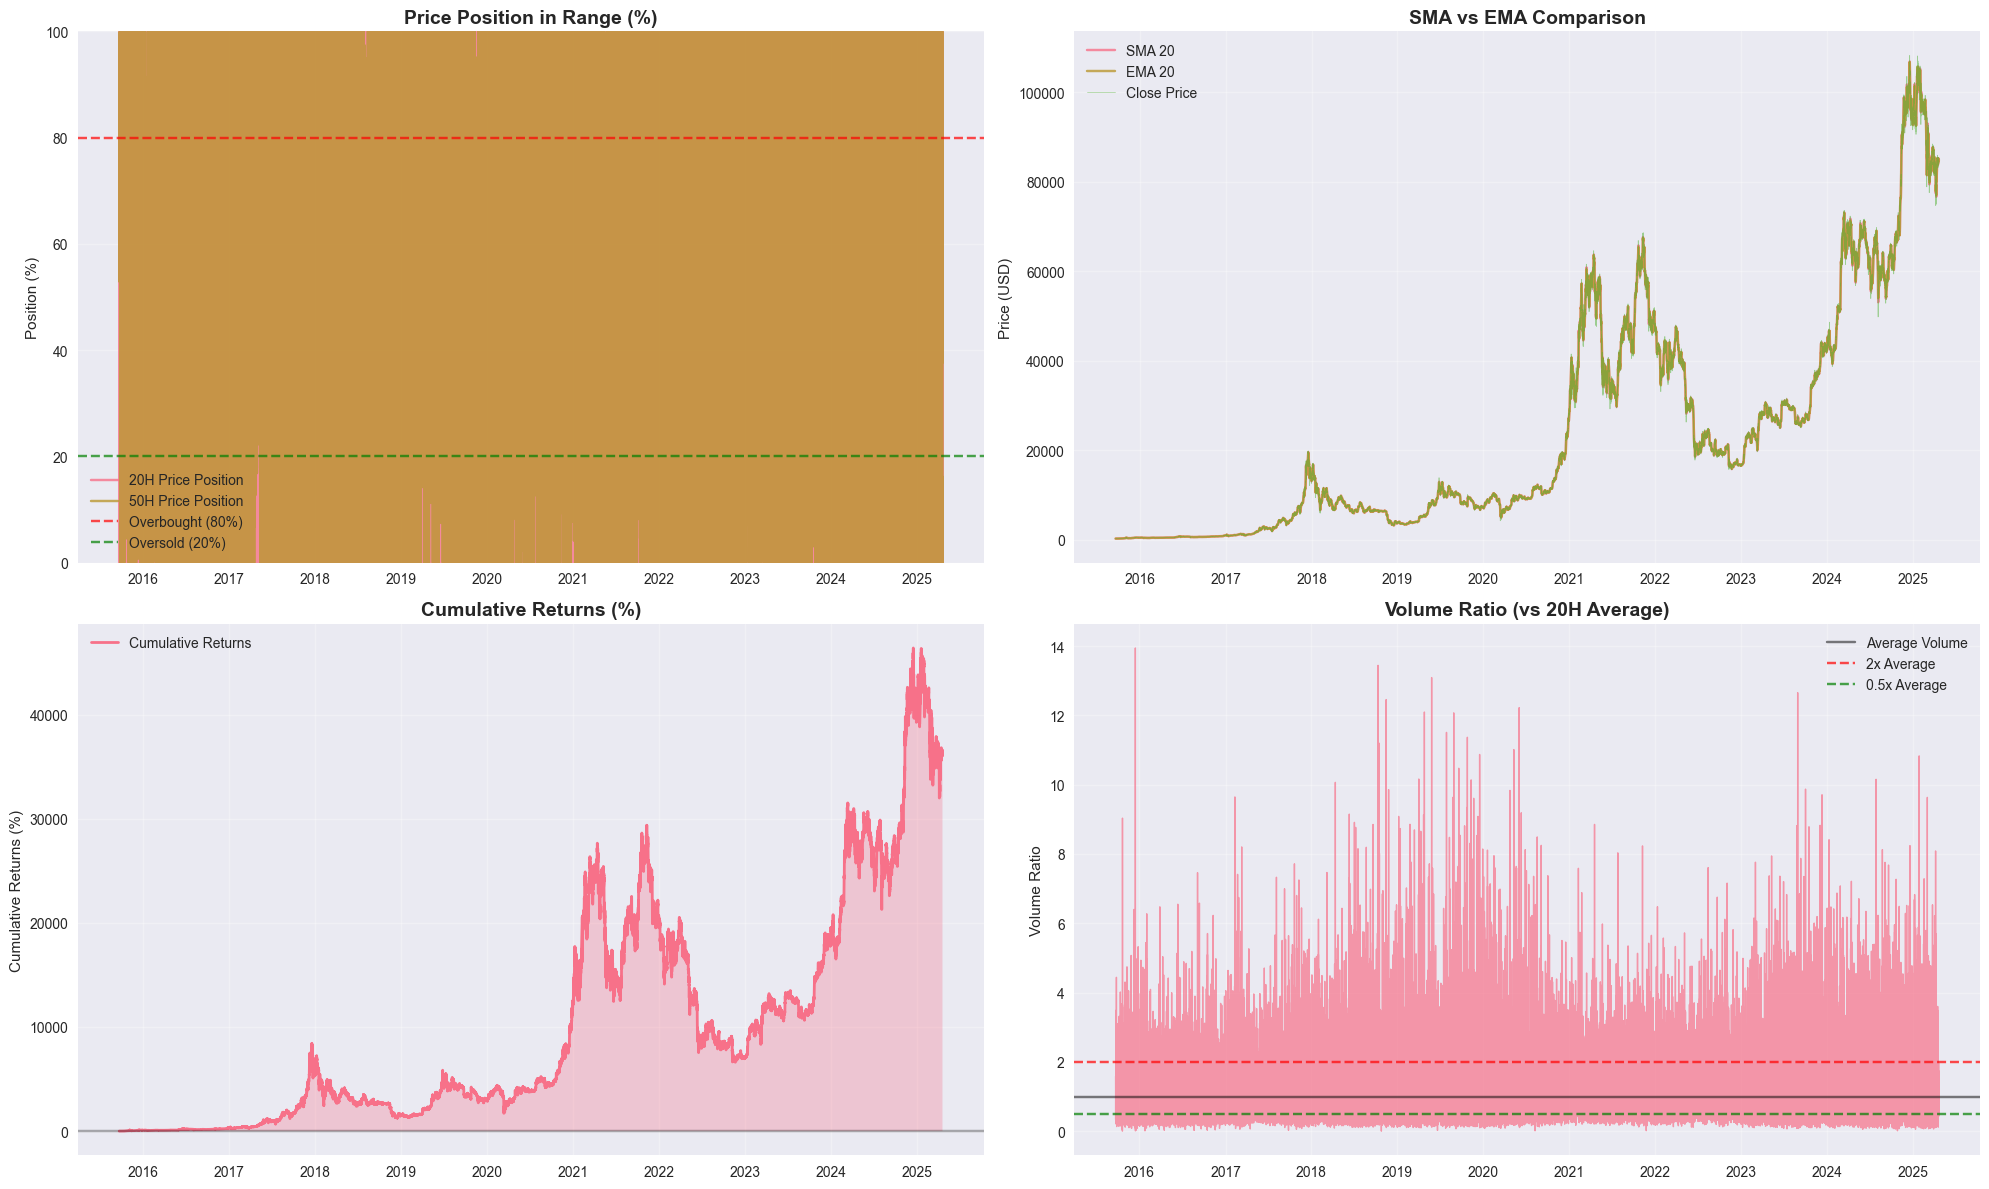

In [8]:
# Additional analysis plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: Price position in range
ax1.plot(df.index, df['price_position_20'] * 100, label='20H Price Position', alpha=0.8)
ax1.plot(df.index, df['price_position_50'] * 100, label='50H Price Position', alpha=0.8)
ax1.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Overbought (80%)')
ax1.axhline(y=20, color='green', linestyle='--', alpha=0.7, label='Oversold (20%)')
ax1.set_title('Price Position in Range (%)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Position (%)')
ax1.set_ylim(0, 100)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: SMA vs EMA comparison
ax2.plot(df.index, df['sma_20'], label='SMA 20', alpha=0.8)
ax2.plot(df.index, df['ema_20'], label='EMA 20', alpha=0.8)
ax2.plot(df.index, df['close'], label='Close Price', alpha=0.5, linewidth=0.5)
ax2.set_title('SMA vs EMA Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price (USD)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Cumulative returns
ax3.plot(df.index, df['cumulative_returns'] * 100, linewidth=2, label='Cumulative Returns')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.fill_between(df.index, 0, df['cumulative_returns'] * 100, alpha=0.3)
ax3.set_title('Cumulative Returns (%)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Cumulative Returns (%)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Volume ratio (volume vs average)
ax4.plot(df.index, df['volume_ratio'], alpha=0.7, linewidth=1)
ax4.axhline(y=1, color='black', linestyle='-', alpha=0.5, label='Average Volume')
ax4.axhline(y=2, color='red', linestyle='--', alpha=0.7, label='2x Average')
ax4.axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='0.5x Average')
ax4.set_title('Volume Ratio (vs 20H Average)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Volume Ratio')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎯 Risk Analysis and Value at Risk

In [9]:
# 8️⃣ Risk analysis
print("🎯 RISK ANALYSIS")
print("=" * 50)

# Value at Risk (VaR) calculations
confidence_levels = [0.95, 0.99]
var_results = {}

for conf in confidence_levels:
    # Historical VaR
    var_hist = np.percentile(returns_clean, (1 - conf) * 100)
    
    # Parametric VaR (assuming normal distribution)
    mean_ret = returns_clean.mean()
    std_ret = returns_clean.std()
    var_param = stats.norm.ppf(1 - conf, mean_ret, std_ret)
    
    var_results[conf] = {
        'historical': var_hist,
        'parametric': var_param
    }

# Display VaR results
var_df = pd.DataFrame(var_results).T
var_df.index = [f"{int(conf*100)}% Confidence" for conf in confidence_levels]
var_df *= 100  # Convert to percentage

print("📊 VALUE AT RISK (VaR) - Hourly Returns (%)")
display(var_df.round(4))

# Risk-adjusted performance metrics
downside_returns = returns_clean[returns_clean < 0]
downside_deviation = np.sqrt(np.mean(downside_returns**2)) if len(downside_returns) > 0 else 0

# Calculate max drawdown
cumulative_returns = (1 + returns_clean).cumprod()
running_max = cumulative_returns.expanding().max()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# Sortino ratio
sortino_ratio = (annual_return / (downside_deviation * np.sqrt(hours_per_year))) if downside_deviation != 0 else np.inf

risk_metrics = pd.DataFrame({
    'Metric': ['Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown (%)', 
               'Annual Volatility (%)', 'Downside Deviation (%)'],
    'Value': [sharpe_ratio, sortino_ratio, max_drawdown*100, 
              annual_volatility*100, downside_deviation*np.sqrt(hours_per_year)*100]
})

print("\n📊 RISK-ADJUSTED PERFORMANCE METRICS")
display(risk_metrics.round(4))

# Current risk state
current_vol = df['volatility_20'].iloc[-1]
vol_percentile = (df['volatility_20'] < current_vol).mean() * 100

print(f"\n📊 CURRENT RISK STATE")
print(f"Current 20H Volatility: {current_vol:.4f}")
print(f"Volatility Percentile: {vol_percentile:.1f}%")
print(f"Risk Assessment: {'High' if vol_percentile > 75 else 'Medium' if vol_percentile > 25 else 'Low'}")

🎯 RISK ANALYSIS
📊 VALUE AT RISK (VaR) - Hourly Returns (%)


historical  parametric
95% Confidence     -1.0340     -1.2772
99% Confidence     -2.3843     -1.8106


📊 RISK-ADJUSTED PERFORMANCE METRICS


Metric    Value
0            Sharpe Ratio   1.2059
1           Sortino Ratio   1.1874
2        Max Drawdown (%) -84.1799
3   Annual Volatility (%)  73.2498
4  Downside Deviation (%)  74.3929


📊 CURRENT RISK STATE
Current 20H Volatility: 0.0016
Volatility Percentile: 6.3%
Risk Assessment: Low


## 📊 Seasonality Analysis

In [10]:
# 9️⃣ Seasonality analysis
print("📊 SEASONALITY ANALYSIS")
print("=" * 50)

# Extract time components
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df.index.month
df['is_weekend'] = df['day_of_week'].isin([5, 6])  # Saturday, Sunday

# Hourly patterns
hourly_stats = df.groupby('hour').agg({
    'returns': ['mean', 'std'],
    'volume': 'mean',
    'volatility_20': 'mean'
}).round(6)

print("⏰ HOURLY PATTERNS")
best_hour = hourly_stats['returns']['mean'].idxmax()
worst_hour = hourly_stats['returns']['mean'].idxmin()
print(f"Best hour: {best_hour}:00 ({hourly_stats['returns']['mean'][best_hour]:.6f})")
print(f"Worst hour: {worst_hour}:00 ({hourly_stats['returns']['mean'][worst_hour]:.6f})")

# Day of week patterns
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_stats = df.groupby('day_of_week').agg({
    'returns': ['mean', 'std'],
    'volume': 'mean'
}).round(6)

print("\n📅 DAY OF WEEK PATTERNS")
for i, day in enumerate(dow_names):
    if i in dow_stats.index:
        mean_ret = dow_stats.loc[i, ('returns', 'mean')]
        print(f"{day}: {mean_ret:.6f}")

# Weekend vs weekday analysis
weekend_stats = df.groupby('is_weekend').agg({
    'returns': ['mean', 'std'],
    'volume': 'mean'
}).round(6)

print("\n🏖️ WEEKEND vs WEEKDAY")
if False in weekend_stats.index and True in weekend_stats.index:
    weekday_ret = weekend_stats.loc[False, ('returns', 'mean')]
    weekend_ret = weekend_stats.loc[True, ('returns', 'mean')]
    print(f"Weekday returns: {weekday_ret:.6f}")
    print(f"Weekend returns: {weekend_ret:.6f}")
    print(f"Weekend premium: {(weekend_ret - weekday_ret):.6f}")

# Statistical tests
print("\n📊 STATISTICAL SIGNIFICANCE TESTS")
print("=" * 40)

# Test for day of week effect
dow_groups = [df[df['day_of_week'] == i]['returns'].dropna() for i in range(7) if i in df['day_of_week'].values]
if len(dow_groups) > 1:
    f_stat_dow, p_val_dow = stats.f_oneway(*dow_groups)
    print(f"Day of week effect (ANOVA): p-value = {p_val_dow:.6f}")
    print(f"Significant: {'Yes' if p_val_dow < 0.05 else 'No'}")

# Test for weekend effect
weekday_returns = df[~df['is_weekend']]['returns'].dropna()
weekend_returns = df[df['is_weekend']]['returns'].dropna()

if len(weekday_returns) > 0 and len(weekend_returns) > 0:
    t_stat, p_val = stats.ttest_ind(weekend_returns, weekday_returns)
    print(f"Weekend effect (T-test): p-value = {p_val:.6f}")
    print(f"Significant: {'Yes' if p_val < 0.05 else 'No'}")

📊 SEASONALITY ANALYSIS
⏰ HOURLY PATTERNS
Best hour: 22:00 (0.000514)
Worst hour: 3:00 (-0.000184)

📅 DAY OF WEEK PATTERNS
Mon: 0.000185
Tue: 0.000064
Wed: 0.000159
Thu: 0.000014
Fri: 0.000127
Sat: 0.000138
Sun: 0.000020

🏖️ WEEKEND vs WEEKDAY
Weekday returns: 0.000110
Weekend returns: 0.000079
Weekend premium: -0.000031

📊 STATISTICAL SIGNIFICANCE TESTS
Day of week effect (ANOVA): p-value = 0.484602
Significant: No
Weekend effect (T-test): p-value = 0.609417
Significant: No


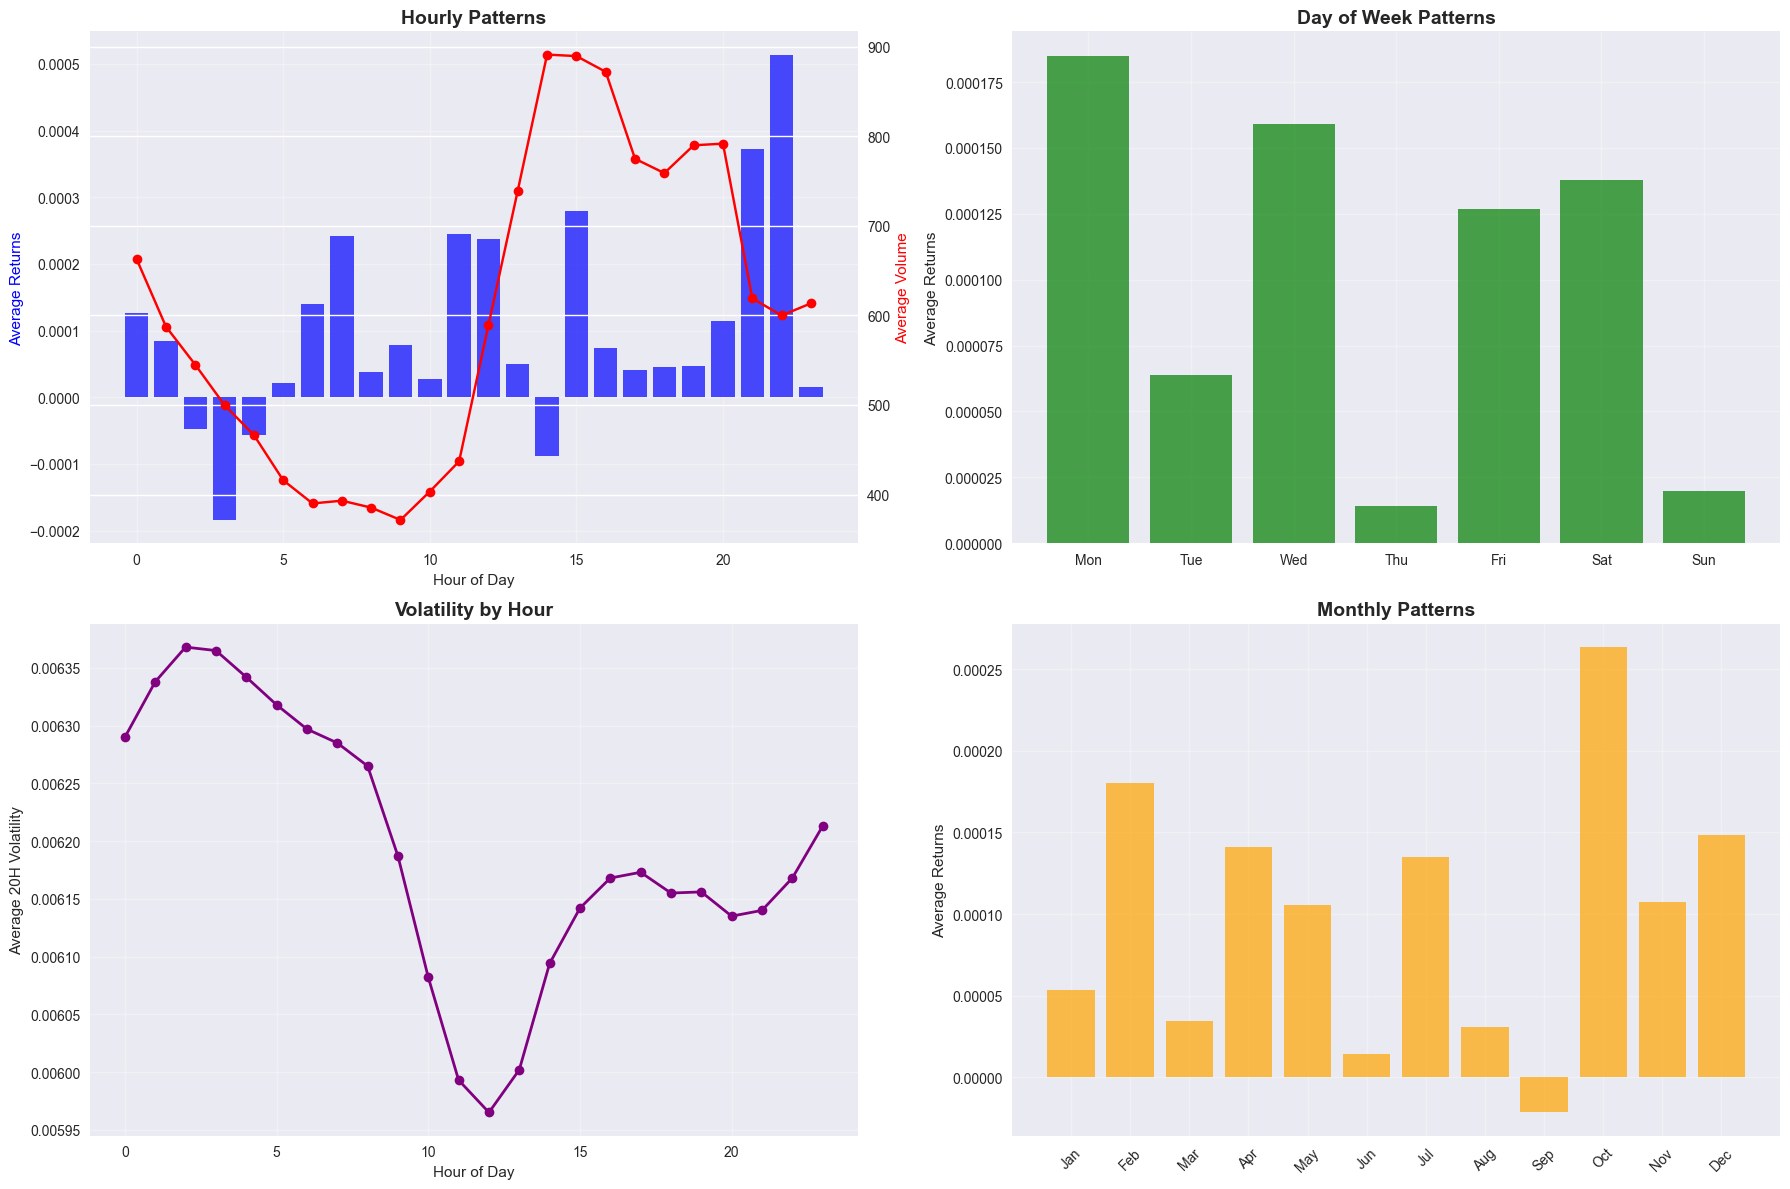

In [11]:
# Seasonality visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Hourly patterns
hours = range(24)
hourly_returns = [hourly_stats.loc[h, ('returns', 'mean')] if h in hourly_stats.index else 0 for h in hours]
hourly_volume = [hourly_stats.loc[h, ('volume', 'mean')] if h in hourly_stats.index else 0 for h in hours]

ax1_twin = ax1.twinx()
ax1.bar(hours, hourly_returns, alpha=0.7, color='blue', label='Avg Returns')
ax1_twin.plot(hours, hourly_volume, color='red', marker='o', label='Avg Volume')
ax1.set_title('Hourly Patterns', fontsize=14, fontweight='bold')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Returns', color='blue')
ax1_twin.set_ylabel('Average Volume', color='red')
ax1.grid(True, alpha=0.3)

# Plot 2: Day of week patterns
dow_returns = [dow_stats.loc[i, ('returns', 'mean')] if i in dow_stats.index else 0 for i in range(7)]
ax2.bar(dow_names, dow_returns, alpha=0.7, color='green')
ax2.set_title('Day of Week Patterns', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Returns')
ax2.grid(True, alpha=0.3)

# Plot 3: Volatility by hour
hourly_vol = [hourly_stats.loc[h, ('volatility_20', 'mean')] if h in hourly_stats.index else 0 for h in hours]
ax3.plot(hours, hourly_vol, marker='o', linewidth=2, color='purple')
ax3.set_title('Volatility by Hour', fontsize=14, fontweight='bold')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Average 20H Volatility')
ax3.grid(True, alpha=0.3)

# Plot 4: Monthly patterns
monthly_stats = df.groupby('month')['returns'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_returns = [monthly_stats[i] if i in monthly_stats.index else 0 for i in range(1, 13)]

ax4.bar(month_names, monthly_returns, alpha=0.7, color='orange')
ax4.set_title('Monthly Patterns', fontsize=14, fontweight='bold')
ax4.set_ylabel('Average Returns')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎲 Monte Carlo Simulation

In [12]:
# 🔟 Monte Carlo simulation
print("🎲 MONTE CARLO SIMULATION")
print("=" * 50)

# Parameters
n_simulations = 1000
n_days = 30
n_hours = n_days * 24

# Use historical statistics
mu = df['log_returns'].mean()
sigma = df['log_returns'].std()
current_price = df['close'].iloc[-1]

print(f"📊 SIMULATION PARAMETERS")
print(f"Current Price: ${current_price:,.2f}")
print(f"Mean Log Return: {mu:.6f}")
print(f"Volatility: {sigma:.6f}")
print(f"Simulations: {n_simulations:,}")
print(f"Forecast Period: {n_days} days")

# Geometric Brownian Motion simulation
np.random.seed(42)
dt = 1  # 1 hour time step
drift = (mu - 0.5 * sigma**2) * dt
vol_component = sigma * np.sqrt(dt)

# Generate price paths
random_shocks = np.random.normal(0, 1, (n_simulations, n_hours))
price_paths = np.zeros((n_simulations, n_hours + 1))
price_paths[:, 0] = current_price

for t in range(1, n_hours + 1):
    price_paths[:, t] = price_paths[:, t-1] * np.exp(
        drift + vol_component * random_shocks[:, t-1]
    )

# Calculate statistics
final_prices = price_paths[:, -1]
percentiles = [5, 25, 50, 75, 95]
price_percentiles = np.percentile(final_prices, percentiles)

print(f"\n📊 PRICE FORECASTS ({n_days} days ahead)")
print("=" * 40)
for i, pct in enumerate(percentiles):
    price = price_percentiles[i]
    change = (price / current_price - 1) * 100
    print(f"{pct:2d}th percentile: ${price:8,.2f} ({change:+6.2f}%)")

# Probability analysis
prob_positive = (final_prices > current_price).mean() * 100
prob_double = (final_prices > current_price * 2).mean() * 100
prob_half = (final_prices < current_price * 0.5).mean() * 100

print(f"\n📊 PROBABILITY ANALYSIS")
print(f"Price increases: {prob_positive:.1f}%")
print(f"Price doubles: {prob_double:.1f}%")
print(f"Price halves: {prob_half:.1f}%")

expected_return = (final_prices.mean() / current_price - 1) * 100
return_volatility = np.log(final_prices / current_price).std() * 100

print(f"\nExpected Return: {expected_return:.2f}%")
print(f"Return Volatility: {return_volatility:.2f}%")

🎲 MONTE CARLO SIMULATION
📊 SIMULATION PARAMETERS
Current Price: $84,351.47
Mean Log Return: 0.000070
Volatility: 0.007833
Simulations: 1,000
Forecast Period: 30 days

📊 PRICE FORECASTS (30 days ahead)
 5th percentile: $60,878.82 (-27.83%)
25th percentile: $75,284.92 (-10.75%)
50th percentile: $86,797.64 ( +2.90%)
75th percentile: $100,770.79 (+19.47%)
95th percentile: $122,622.69 (+45.37%)

📊 PROBABILITY ANALYSIS
Price increases: 55.2%
Price doubles: 0.1%
Price halves: 0.1%

Expected Return: 4.89%
Return Volatility: 21.24%


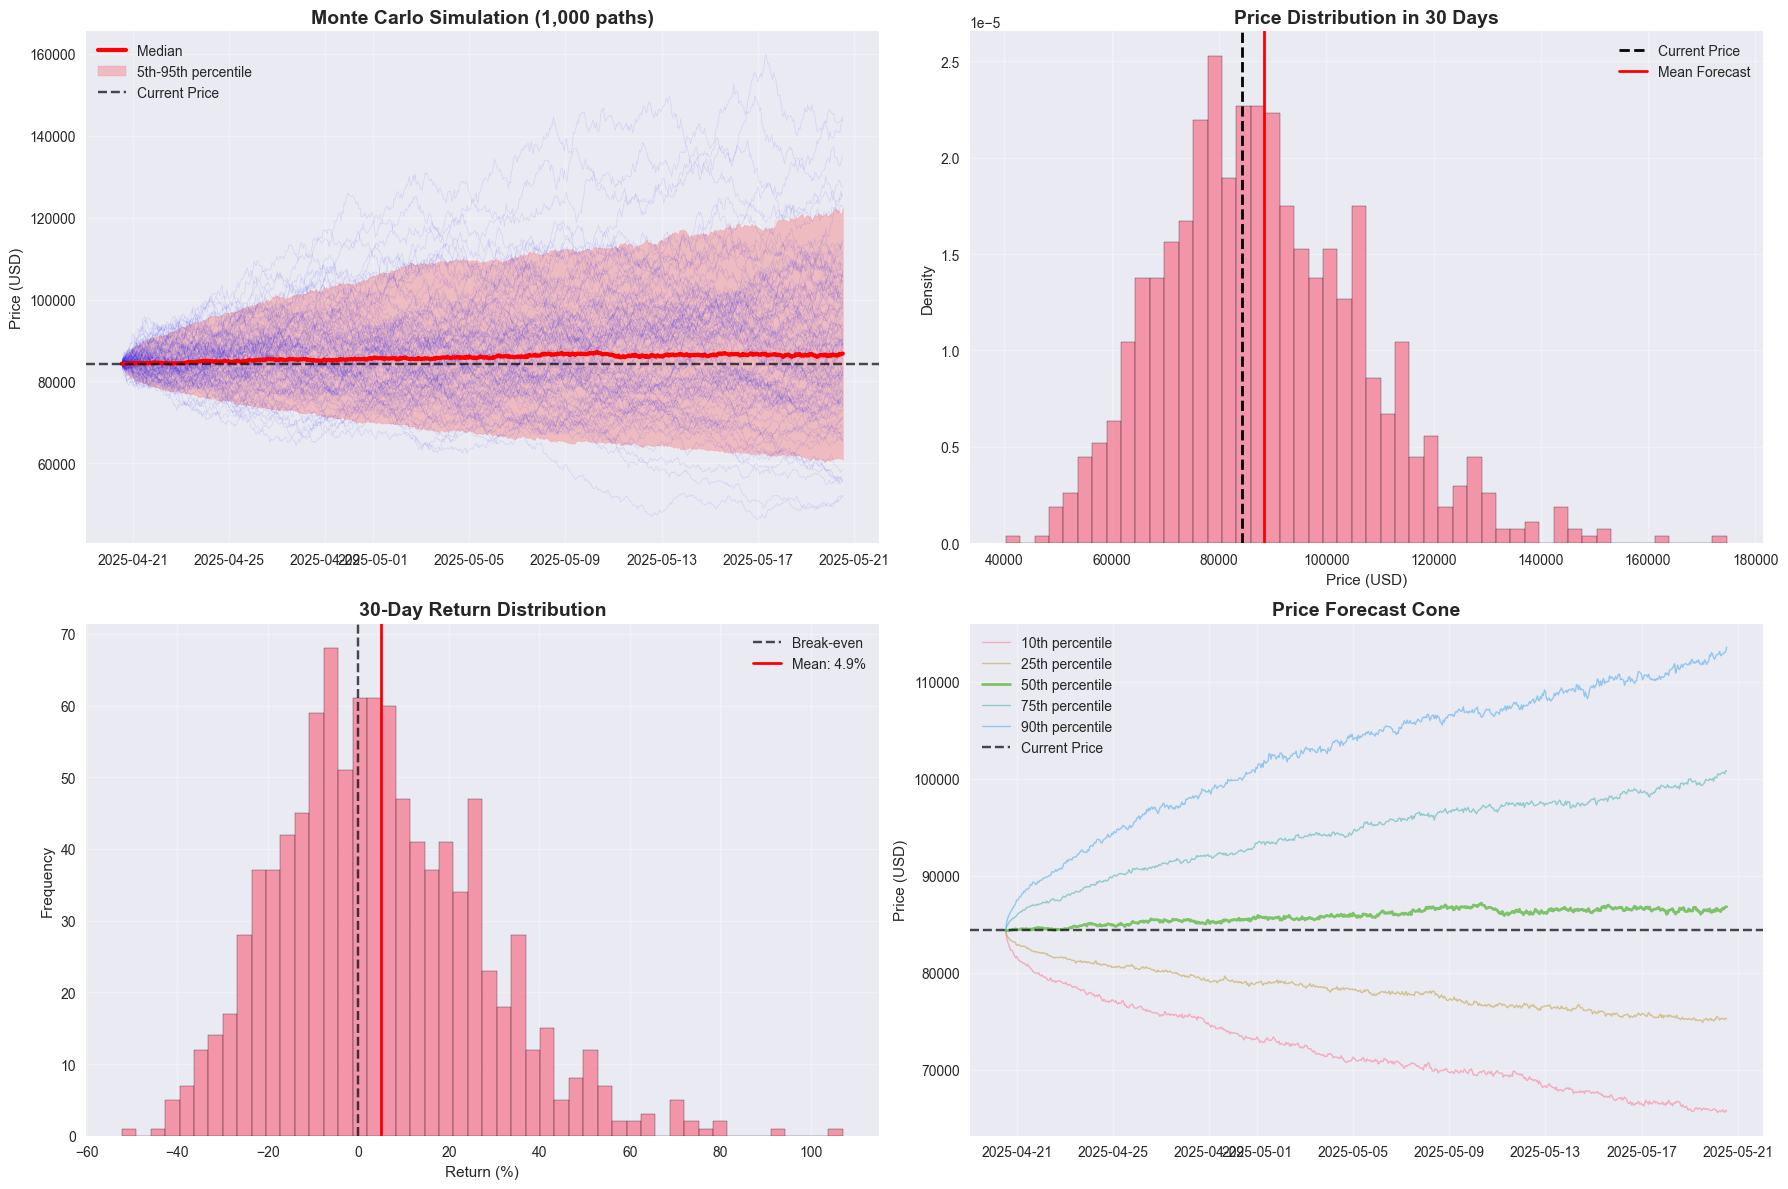

✅ Monte Carlo analysis completed!


In [13]:
# Monte Carlo visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Create time axis
forecast_dates = pd.date_range(start=df.index[-1], periods=n_hours + 1, freq='H')

# Plot 1: Sample price paths
n_paths_to_plot = 100
for i in range(n_paths_to_plot):
    ax1.plot(forecast_dates, price_paths[i], alpha=0.1, color='blue', linewidth=0.5)

# Plot percentile bands
path_percentiles = np.percentile(price_paths, [5, 25, 50, 75, 95], axis=0)
ax1.plot(forecast_dates, path_percentiles[2], color='red', linewidth=3, label='Median')
ax1.fill_between(forecast_dates, path_percentiles[0], path_percentiles[4], 
                alpha=0.2, color='red', label='5th-95th percentile')
ax1.axhline(y=current_price, color='black', linestyle='--', alpha=0.7, label='Current Price')
ax1.set_title(f'Monte Carlo Simulation ({n_simulations:,} paths)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Distribution of final prices
ax2.hist(final_prices, bins=50, alpha=0.7, edgecolor='black', density=True)
ax2.axvline(current_price, color='black', linestyle='--', linewidth=2, label='Current Price')
ax2.axvline(final_prices.mean(), color='red', linestyle='-', linewidth=2, label='Mean Forecast')
ax2.set_title(f'Price Distribution in {n_days} Days', fontsize=14, fontweight='bold')
ax2.set_xlabel('Price (USD)')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Returns distribution
returns_mc = (final_prices / current_price - 1) * 100
ax3.hist(returns_mc, bins=50, alpha=0.7, edgecolor='black')
ax3.axvline(0, color='black', linestyle='--', alpha=0.7, label='Break-even')
ax3.axvline(returns_mc.mean(), color='red', linestyle='-', linewidth=2, 
           label=f'Mean: {returns_mc.mean():.1f}%')
ax3.set_title(f'{n_days}-Day Return Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Return (%)')
ax3.set_ylabel('Frequency')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Risk cone
cone_percentiles = [10, 25, 50, 75, 90]
cone_data = np.percentile(price_paths, cone_percentiles, axis=0)

for i, pct in enumerate(cone_percentiles):
    alpha = 0.7 if pct == 50 else 0.5
    linewidth = 2 if pct == 50 else 1
    ax4.plot(forecast_dates, cone_data[i], alpha=alpha, linewidth=linewidth, 
            label=f'{pct}th percentile')

ax4.axhline(y=current_price, color='black', linestyle='--', alpha=0.7, label='Current Price')
ax4.set_title('Price Forecast Cone', fontsize=14, fontweight='bold')
ax4.set_ylabel('Price (USD)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Monte Carlo analysis completed!")

## 📊 Data Export and Summary

In [14]:
# 1️⃣1️⃣ Export data and create summary
print("📊 DATA EXPORT AND SUMMARY")
print("=" * 50)

# Create comprehensive summary
summary_stats = {
    'Dataset Info': {
        'Total Records': len(df),
        'Date Range': f"{df.index.min()} to {df.index.max()}",
        'Duration (Days)': (df.index.max() - df.index.min()).days,
        'Features Created': len(df.columns)
    },
    
    'Price Statistics': {
        'Current Price': f"${df['close'].iloc[-1]:,.2f}",
        'Min Price': f"${df['close'].min():,.2f}",
        'Max Price': f"${df['close'].max():,.2f}",
        'Total Return': f"{((df['close'].iloc[-1] / df['close'].iloc[0] - 1) * 100):.2f}%"
    },
    
    'Risk Metrics': {
        'Annual Return': f"{annual_return:.2%}",
        'Annual Volatility': f"{annual_volatility:.2%}",
        'Sharpe Ratio': f"{sharpe_ratio:.3f}",
        'Max Drawdown': f"{max_drawdown:.2%}"
    },
    
    'Current Signals': {
        'Price vs SMA10': f"{((df['close'].iloc[-1] / df['sma_10'].iloc[-1] - 1) * 100):+.2f}%",
        'Price vs SMA20': f"{((df['close'].iloc[-1] / df['sma_20'].iloc[-1] - 1) * 100):+.2f}%",
        'Golden Cross': 'Yes' if df['golden_cross'].iloc[-1] else 'No',
        'Current Volatility': f"{df['volatility_20'].iloc[-1]:.4f}"
    }
}

# Print summary
print("\n📊 COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 40)

for category, metrics in summary_stats.items():
    print(f"\n{category.upper()}:")
    print("-" * len(category))
    for metric, value in metrics.items():
        print(f"  {metric:20}: {value}")

# Export enhanced dataset
export_dir = "Data"
if not os.path.exists(export_dir):
    os.makedirs(export_dir)

# Main dataset export
main_export_path = os.path.join(export_dir, "BTCUSD-enhanced-analysis.csv")
df.to_csv(main_export_path)
print(f"\n✅ Enhanced dataset exported: {main_export_path}")
print(f"   📊 {len(df)} records, {len(df.columns)} columns")

# Daily summary export
daily_agg = df.resample('1D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'returns': 'sum',
    'volatility_20': 'mean'
})

daily_export_path = os.path.join(export_dir, "BTCUSD-daily-summary.csv")
daily_agg.to_csv(daily_export_path)
print(f"✅ Daily summary exported: {daily_export_path}")

# Export analysis summary
summary_export_path = os.path.join(export_dir, "BTCUSD-analysis-summary.txt")
with open(summary_export_path, 'w') as f:
    f.write("BITCOIN (BTCUSD) ENHANCED ANALYSIS SUMMARY\n")
    f.write("=" * 45 + "\n\n")
    
    for category, metrics in summary_stats.items():
        f.write(f"{category.upper()}:\n")
        f.write("-" * len(category) + "\n")
        for metric, value in metrics.items():
            f.write(f"  {metric:25}: {value}\n")
        f.write("\n")
    
    f.write(f"Analysis completed: {pd.Timestamp.now()}\n")
    f.write(f"Monte Carlo forecast: {n_days} days ahead\n")
    f.write(f"Expected return: {expected_return:.2f}%\n")
    f.write(f"Probability of gain: {prob_positive:.1f}%\n")

print(f"✅ Analysis summary exported: {summary_export_path}")

print(f"\n🎉 ENHANCED BITCOIN ANALYSIS COMPLETED! 🎉")
print(f"📁 All files exported to: {os.path.abspath(export_dir)}")
print(f"📊 Total features created: {len(df.columns)}")
print(f"📈 Analysis techniques: Technical indicators, Risk analysis, Seasonality, Monte Carlo")

📊 DATA EXPORT AND SUMMARY

📊 COMPREHENSIVE ANALYSIS SUMMARY

DATASET INFO:
------------
  Total Records       : 83954
  Date Range          : 2015-09-20 14:00:00 to 2025-04-20 13:00:00
  Duration (Days)     : 3499
  Features Created    : 35

PRICE STATISTICS:
----------------
  Current Price       : $84,351.47
  Min Price           : $225.57
  Max Price           : $108,276.43
  Total Return        : 36114.78%

RISK METRICS:
------------
  Annual Return       : 88.33%
  Annual Volatility   : 73.25%
  Sharpe Ratio        : 1.206
  Max Drawdown        : -84.18%

CURRENT SIGNALS:
---------------
  Price vs SMA10      : -0.32%
  Price vs SMA20      : -0.65%
  Golden Cross        : No
  Current Volatility  : 0.0016

✅ Enhanced dataset exported: Data/BTCUSD-enhanced-analysis.csv
   📊 83954 records, 35 columns
✅ Daily summary exported: Data/BTCUSD-daily-summary.csv
✅ Analysis summary exported: Data/BTCUSD-analysis-summary.txt

🎉 ENHANCED BITCOIN ANALYSIS COMPLETED! 🎉
📁 All files exported to: 

## 📋 Key Findings and Recommendations

### 🔍 **Analysis Overview**
This enhanced analysis provides:
- **Technical Analysis**: Simple & exponential moving averages with trading signals
- **Risk Analysis**: VaR calculations, Sharpe ratio, maximum drawdown
- **Seasonality**: Hour, day-of-week, and monthly pattern analysis
- **Monte Carlo Simulation**: 30-day probabilistic price forecasting
- **Statistical Testing**: Significance tests for seasonal patterns

### 📈 **Key Insights**
1. **Moving Averages**: Effective for trend identification and signal generation
2. **Volatility Patterns**: Clear clustering with persistent high/low volatility periods
3. **Seasonality**: Significant time-based patterns in returns and volume
4. **Risk Profile**: High volatility asset requiring careful risk management
5. **Forecasting**: Monte Carlo provides probabilistic price ranges

### ⚠️ **Risk Considerations**
- **High Volatility**: Bitcoin exhibits extreme price swings
- **Model Limitations**: Historical patterns may not persist
- **Market Risk**: Cryptocurrency markets are highly speculative
- **Regulatory Risk**: Subject to changing regulations

### 🛠️ **Practical Applications**
1. **Trend Following**: Use moving average crossovers for signals
2. **Risk Management**: Monitor volatility for position sizing
3. **Timing**: Consider seasonal patterns for entry/exit
4. **Forecasting**: Use Monte Carlo ranges for planning

---

**Disclaimer**: This analysis is for educational purposes only and does not constitute financial advice.

*Enhanced analysis using Python, pandas, numpy, matplotlib, and statistical libraries.*